In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

In [ ]:
df1 = pd.read_csv('GLDF_ESM4 1980-2014 .csv')
df1

,Date,hurs,huss,pr,prsn,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
0,1/1/1980,24.13064,0.016942,0.000000,0.0,100873.2,199.88780,406.9503,1.762531,299.5450,304.6036,295.8168
1,1/2/1980,23.92169,0.018031,0.352933,0.0,100867.4,214.30970,407.6529,1.208650,299.7536,304.6317,295.1970
2,1/3/1980,21.95358,0.018134,0.158529,0.0,100819.8,211.68070,409.7419,0.773226,299.8491,304.8334,296.2072
3,1/4/1980,23.31655,0.018510,0.000000,0.0,100685.9,197.04600,414.0836,0.968103,300.1741,304.9903,296.0473
4,1/5/1980,21.73940,0.018636,0.000000,0.0,100639.3,206.42960,416.6946,1.069319,300.4881,305.1294,295.9986
...,...,...,...,...,...,...,...,...,...,...,...,...
12779,12/27/2014,27.36200,0.019793,9.539493,0.0,100345.6,118.55980,435.8821,2.377360,299.9697,303.0520,298.2183
12780,12/28/2014,25.95302,0.019591,8.122045,0.0,100541.2,82.63331,432.9671,2.534230,299.7074,301.6453,297.7395
12781,12/29/2014,22.23770,0.019387,0.633353,0.0,100716.1,179.35120,423.6180,1.188818,300.5147,303.9991,297.9998
12782,12/30/2014,22.39242,0.019470,0.764738,0.0,100754.3,200.04400,420.7432,1.053552,300.5270,304.1916,298.0242


In [ ]:
dfcopy = df1.copy()

In [ ]:
# Chọn dữ liệu từ ngày 1-1-1980 trở đi
# start_date = dt.datetime(1980, 1, 1)
# dfcopy['Date'] = pd.to_datetime(dfcopy['Date'])
# GCM_data = dfcopy[dfcopy['Date'] >= start_date]

In [ ]:
GCM_data

,Date,hurs,huss,pr,prsn,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
0,1980-01-01,24.13064,0.016942,0.000000,0.0,100873.2,199.88780,406.9503,1.762531,299.5450,304.6036,295.8168
1,1980-01-02,23.92169,0.018031,0.352933,0.0,100867.4,214.30970,407.6529,1.208650,299.7536,304.6317,295.1970
2,1980-01-03,21.95358,0.018134,0.158529,0.0,100819.8,211.68070,409.7419,0.773226,299.8491,304.8334,296.2072
3,1980-01-04,23.31655,0.018510,0.000000,0.0,100685.9,197.04600,414.0836,0.968103,300.1741,304.9903,296.0473
4,1980-01-05,21.73940,0.018636,0.000000,0.0,100639.3,206.42960,416.6946,1.069319,300.4881,305.1294,295.9986
...,...,...,...,...,...,...,...,...,...,...,...,...
12779,2014-12-27,27.36200,0.019793,9.539493,0.0,100345.6,118.55980,435.8821,2.377360,299.9697,303.0520,298.2183
12780,2014-12-28,25.95302,0.019591,8.122045,0.0,100541.2,82.63331,432.9671,2.534230,299.7074,301.6453,297.7395
12781,2014-12-29,22.23770,0.019387,0.633353,0.0,100716.1,179.35120,423.6180,1.188818,300.5147,303.9991,297.9998
12782,2014-12-30,22.39242,0.019470,0.764738,0.0,100754.3,200.04400,420.7432,1.053552,300.5270,304.1916,298.0242


In [ ]:
actual_data = pd.read_excel('Precipitation_actual.xlsx')
actual_data

,Date,actual Precipitation
0,1980-01-01,0.0
1,1980-01-02,0.0
2,1980-01-03,0.0
3,1980-01-04,0.0
4,1980-01-05,0.0
...,...,...
12779,2014-12-27,0.0
12780,2014-12-28,0.0
12781,2014-12-29,0.0
12782,2014-12-30,0.0


# Merged data

In [ ]:
# Merge GCM data into the new DataFrame based on date
merged_data = pd.merge(actual_data, GCM_data, on='Date', how='left')
merged_data

,Date,actual Precipitation,hurs,huss,pr,prsn,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
0,1980-01-01,0.0,24.13064,0.016942,0.000000,0.0,100873.2,199.88780,406.9503,1.762531,299.5450,304.6036,295.8168
1,1980-01-02,0.0,23.92169,0.018031,0.352933,0.0,100867.4,214.30970,407.6529,1.208650,299.7536,304.6317,295.1970
2,1980-01-03,0.0,21.95358,0.018134,0.158529,0.0,100819.8,211.68070,409.7419,0.773226,299.8491,304.8334,296.2072
3,1980-01-04,0.0,23.31655,0.018510,0.000000,0.0,100685.9,197.04600,414.0836,0.968103,300.1741,304.9903,296.0473
4,1980-01-05,0.0,21.73940,0.018636,0.000000,0.0,100639.3,206.42960,416.6946,1.069319,300.4881,305.1294,295.9986
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12779,2014-12-27,0.0,27.36200,0.019793,9.539493,0.0,100345.6,118.55980,435.8821,2.377360,299.9697,303.0520,298.2183
12780,2014-12-28,0.0,25.95302,0.019591,8.122045,0.0,100541.2,82.63331,432.9671,2.534230,299.7074,301.6453,297.7395
12781,2014-12-29,0.0,22.23770,0.019387,0.633353,0.0,100716.1,179.35120,423.6180,1.188818,300.5147,303.9991,297.9998
12782,2014-12-30,0.0,22.39242,0.019470,0.764738,0.0,100754.3,200.04400,420.7432,1.053552,300.5270,304.1916,298.0242


In [ ]:
merged_data.describe()

,actual Precipitation,hurs,huss,pr,prsn,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin,bias
count,12784.000000,12784.000000,12784.000000,12784.000000,1.278400e+04,12784.000000,12784.000000,12784.000000,12784.000000,12784.000000,12784.000000,12784.000000,12784.000000
mean,5.259089,50.157553,0.018715,4.616700,1.394894e-10,100716.479177,210.968605,418.353680,2.236112,300.837325,305.711479,297.415172,0.642389
std,12.754702,26.401892,0.002127,9.057301,2.304891e-09,205.431999,46.261519,15.554084,0.776518,1.308457,1.795277,1.585502,14.664243
min,0.000000,5.389629,0.010463,0.000000,0.000000e+00,99943.460000,27.904250,349.779300,0.517794,295.128300,297.980100,290.193400,-143.621683
25%,0.000000,24.880855,0.017286,0.000000,0.000000e+00,100572.000000,185.339175,410.024150,1.660110,300.085425,304.693025,296.535850,-1.907737
50%,0.000000,48.667860,0.019453,0.000000,0.000000e+00,100703.750000,217.608400,423.194050,2.135401,300.850350,305.647050,297.776900,0.000000
75%,3.600000,77.700468,0.020355,7.399729,0.000000e+00,100851.125000,243.418125,429.436850,2.710103,301.567750,306.706775,298.535450,0.600000
max,162.200000,96.186340,0.023216,143.621683,1.360000e-07,101512.200000,312.002600,453.399000,7.370327,305.383200,311.097500,301.310000,162.200000


In [ ]:
null_counts = merged_data.isna().sum()
null_counts

Date                    0
actual Precipitation    0
hurs                    0
huss                    0
pr                      0
prsn                    0
ps                      0
rlds                    0
rsds                    0
sfcwind                 0
tas                     0
tasmax                  0
tasmin                  0
bias                    0
dtype: int64

# Convert unit of GCM precipitation

In [ ]:
# # Change the unit of GCM precipitation form kg m-2 s-1 to mm/day
# merged_data['pr'] = merged_data['pr'] * 86400
# merged_data

# Calculate mean of each column monthly

In [ ]:
merged_data = merged_data.set_index('Date')
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

merged_data = create_features(merged_data)

In [ ]:
merged_data

,actual Precipitation,hurs,huss,pr,prsn,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin,bias,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,,
1980-01-01,0.0,24.13064,0.016942,0.000000,0.0,100873.2,199.88780,406.9503,1.762531,299.5450,304.6036,295.8168,0.000000,1,1,1980,1,1,1
1980-01-02,0.0,23.92169,0.018031,0.352933,0.0,100867.4,214.30970,407.6529,1.208650,299.7536,304.6317,295.1970,-0.352933,1,1,1980,2,2,1
1980-01-03,0.0,21.95358,0.018134,0.158529,0.0,100819.8,211.68070,409.7419,0.773226,299.8491,304.8334,296.2072,-0.158529,1,1,1980,3,3,1
1980-01-04,0.0,23.31655,0.018510,0.000000,0.0,100685.9,197.04600,414.0836,0.968103,300.1741,304.9903,296.0473,0.000000,1,1,1980,4,4,1
1980-01-05,0.0,21.73940,0.018636,0.000000,0.0,100639.3,206.42960,416.6946,1.069319,300.4881,305.1294,295.9986,0.000000,1,1,1980,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,0.0,27.36200,0.019793,9.539493,0.0,100345.6,118.55980,435.8821,2.377360,299.9697,303.0520,298.2183,-9.539493,4,12,2014,361,27,52
2014-12-28,0.0,25.95302,0.019591,8.122045,0.0,100541.2,82.63331,432.9671,2.534230,299.7074,301.6453,297.7395,-8.122045,4,12,2014,362,28,52
2014-12-29,0.0,22.23770,0.019387,0.633353,0.0,100716.1,179.35120,423.6180,1.188818,300.5147,303.9991,297.9998,-0.633353,4,12,2014,363,29,1


In [ ]:
# Average precipitation by month and year
sumAcPrMonth = merged_data.groupby(['month', 'year'])['actual Precipitation'].mean().reset_index()
# Average hurs by month and year
avgGCMHursMonth = merged_data.groupby(['month', 'year'])['hurs'].mean().reset_index()
# Average huss by month and year
avgGCMHussMonth = merged_data.groupby(['month', 'year'])['huss'].mean().reset_index()
# Average GCM precipitation by month and year
sumGCMPrMonth = merged_data.groupby(['month', 'year'])['pr'].mean().reset_index()
# Average ps by month and year
avgGCMPsMonth = merged_data.groupby(['month', 'year'])['ps'].mean().reset_index()
# Average Prsn by month and year
avgPrsnMonth = merged_data.groupby(['month', 'year'])['prsn'].mean().reset_index()
# Average rlds by month and year
avgGCMRldsMonth = merged_data.groupby(['month', 'year'])['rlds'].mean().reset_index()
# Average rsds by month and year
avgGCMRsdsMonth = merged_data.groupby(['month', 'year'])['rsds'].mean().reset_index()
# Average sfcwind by month and year
avgGCMSfcwindMonth = merged_data.groupby(['month', 'year'])['sfcwind'].mean().reset_index()
# Average tas by month and year
avgGCMtasMonth = merged_data.groupby(['month', 'year'])['tas'].mean().reset_index()
# Average tasmax by month and year
avgGCMtasmaxMonth = merged_data.groupby(['month', 'year'])['tasmax'].mean().reset_index()
# Average tasmin by month and year
avgGCMtasminMonth = merged_data.groupby(['month', 'year'])['tasmin'].mean().reset_index()

In [ ]:
avgGCMtasminMonth

,month,year,tasmin
0,1,1980,295.165735
1,1,1981,293.696094
2,1,1982,294.807710
3,1,1983,295.007490
4,1,1984,292.983829
...,...,...,...
415,12,2010,295.673229
416,12,2011,294.929152
417,12,2012,297.296606
418,12,2013,296.841571


In [ ]:
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
sumAcPrMonth.index = sumAcPrMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMHursMonth.index = avgGCMHursMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMHussMonth.index = avgGCMHussMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
sumGCMPrMonth.index = sumGCMPrMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMRldsMonth.index = avgGCMRldsMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMPsMonth.index = avgGCMPsMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMRsdsMonth.index = avgGCMRsdsMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMSfcwindMonth.index = avgGCMSfcwindMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMtasMonth.index = avgGCMtasMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMtasmaxMonth.index = avgGCMtasmaxMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMtasminMonth.index = avgGCMtasminMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)

In [ ]:
sumAcPrMonth

,month,year,actual Precipitation
1980-01-1,1,1980,1.151613
1981-01-1,1,1981,0.119355
1982-01-1,1,1982,0.000000
1983-01-1,1,1983,0.006452
1984-01-1,1,1984,0.561290
...,...,...,...
2010-12-1,12,2010,1.251613
2011-12-1,12,2011,0.235484
2012-12-1,12,2012,0.819355
2013-12-1,12,2013,1.009677


In [ ]:
sumAcPrMonth.index = pd.to_datetime(sumAcPrMonth.index, format='%Y-%m-%d')
avgGCMHursMonth.index = pd.to_datetime(avgGCMHursMonth.index, format='%Y-%m-%d')
avgGCMHussMonth.index = pd.to_datetime(avgGCMHussMonth.index, format='%Y-%m-%d')
sumGCMPrMonth.index = pd.to_datetime(sumGCMPrMonth.index, format='%Y-%m-%d')
avgGCMRldsMonth.index = pd.to_datetime(avgGCMRldsMonth.index, format='%Y-%m-%d')
avgGCMPsMonth.index = pd.to_datetime(avgGCMPsMonth.index, format='%Y-%m-%d')
avgGCMRsdsMonth.index = pd.to_datetime(avgGCMRsdsMonth.index, format='%Y-%m-%d')
avgGCMSfcwindMonth.index = pd.to_datetime(avgGCMSfcwindMonth.index, format='%Y-%m-%d')
avgGCMtasMonth.index = pd.to_datetime(avgGCMtasMonth.index, format='%Y-%m-%d')
avgGCMtasmaxMonth.index = pd.to_datetime(avgGCMtasmaxMonth.index, format='%Y-%m-%d')
avgGCMtasminMonth.index = pd.to_datetime(avgGCMtasminMonth.index, format='%Y-%m-%d')

In [ ]:
# Tạo chuỗi thời gian từ tháng 1/1980 đến tháng 12/2014
dates = pd.date_range(start="1980-01-01", end="2014-12-01", freq='MS')

# New dataFrame with average value of each columns monthly

In [ ]:
df = pd.DataFrame(index=dates)
df['actual Precipitation'] = sumAcPrMonth.drop(['month','year'], axis = 1)
df['hurs'] = avgGCMHursMonth.drop(['month','year'], axis = 1)
df['huss'] = avgGCMHussMonth.drop(['month','year'], axis = 1)
df['pr'] = sumGCMPrMonth.drop(['month','year'], axis = 1)
df['ps'] = avgGCMPsMonth.drop(['month','year'], axis = 1)
df['rlds'] =avgGCMRldsMonth.drop(['month','year'], axis = 1)
df['rsds'] =avgGCMRsdsMonth.drop(['month','year'], axis = 1)
df['sfcwind'] =avgGCMSfcwindMonth.drop(['month','year'], axis = 1)
df['tas'] =avgGCMtasMonth.drop(['month','year'], axis = 1)
df['tasmax'] =avgGCMtasmaxMonth.drop(['month','year'], axis = 1)
df['tasmin'] =avgGCMtasminMonth.drop(['month','year'], axis = 1)

In [ ]:
df

,actual Precipitation,hurs,huss,pr,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
1980-01-01,1.151613,20.217783,0.016865,0.196739,100654.274194,202.707074,403.026152,1.636951,299.344371,304.502406,295.165735
1980-02-01,0.065517,16.196093,0.016023,0.068121,100781.820690,239.710217,400.579300,2.399301,299.987314,305.667672,295.465100
1980-03-01,0.006452,25.475720,0.016887,1.280007,100659.919355,255.349652,408.401948,2.286761,301.406177,307.143942,297.105961
1980-04-01,0.086667,41.807535,0.019583,2.445651,100514.503333,253.298533,426.087907,1.800252,302.577863,308.107803,298.533610
1980-05-01,9.293548,63.702356,0.020317,11.964263,100520.493548,192.478623,429.196306,1.462682,301.155545,305.805477,298.226206
...,...,...,...,...,...,...,...,...,...,...,...
2014-08-01,11.400000,84.766235,0.020595,3.417443,100674.558065,229.438210,428.665635,1.893382,302.116194,306.594545,299.066410
2014-09-01,11.403333,82.640061,0.020867,11.534735,100650.540000,183.214280,432.732727,1.700424,301.578667,305.745137,298.894453
2014-10-01,9.887097,63.305593,0.019914,5.469218,100684.667742,179.573997,425.458639,1.682080,300.599716,304.833061,297.526271
2014-11-01,6.073333,35.932858,0.019647,6.922665,100655.156667,169.879569,426.712477,1.768685,300.734673,304.604853,297.647433


In [ ]:
df.describe()

,actual Precipitation,hurs,huss,pr,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,5.236412,49.989811,0.018703,4.596964,100717.176686,211.130994,418.271403,2.237848,300.836366,305.714751,297.409558
std,4.576216,25.044550,0.001863,4.328404,159.001670,29.531947,13.125954,0.504622,1.079460,1.377318,1.337127
min,0.000000,13.097749,0.013896,0.000000,100423.186667,136.115595,378.248739,1.256027,297.765597,302.046955,292.983829
25%,0.543038,25.334355,0.017009,0.361658,100587.853226,189.674145,408.688277,1.834879,300.162141,304.812303,296.534371
50%,4.917849,47.087213,0.019382,3.947324,100699.250000,207.983094,423.195153,2.157588,300.786538,305.434005,297.739146
75%,8.621774,76.081197,0.020178,8.002880,100841.269892,231.797253,428.525250,2.582905,301.420143,306.461862,298.386383
max,17.930000,85.450205,0.021496,21.624989,101156.558065,281.277616,441.240342,3.840730,303.806748,309.572007,300.047452


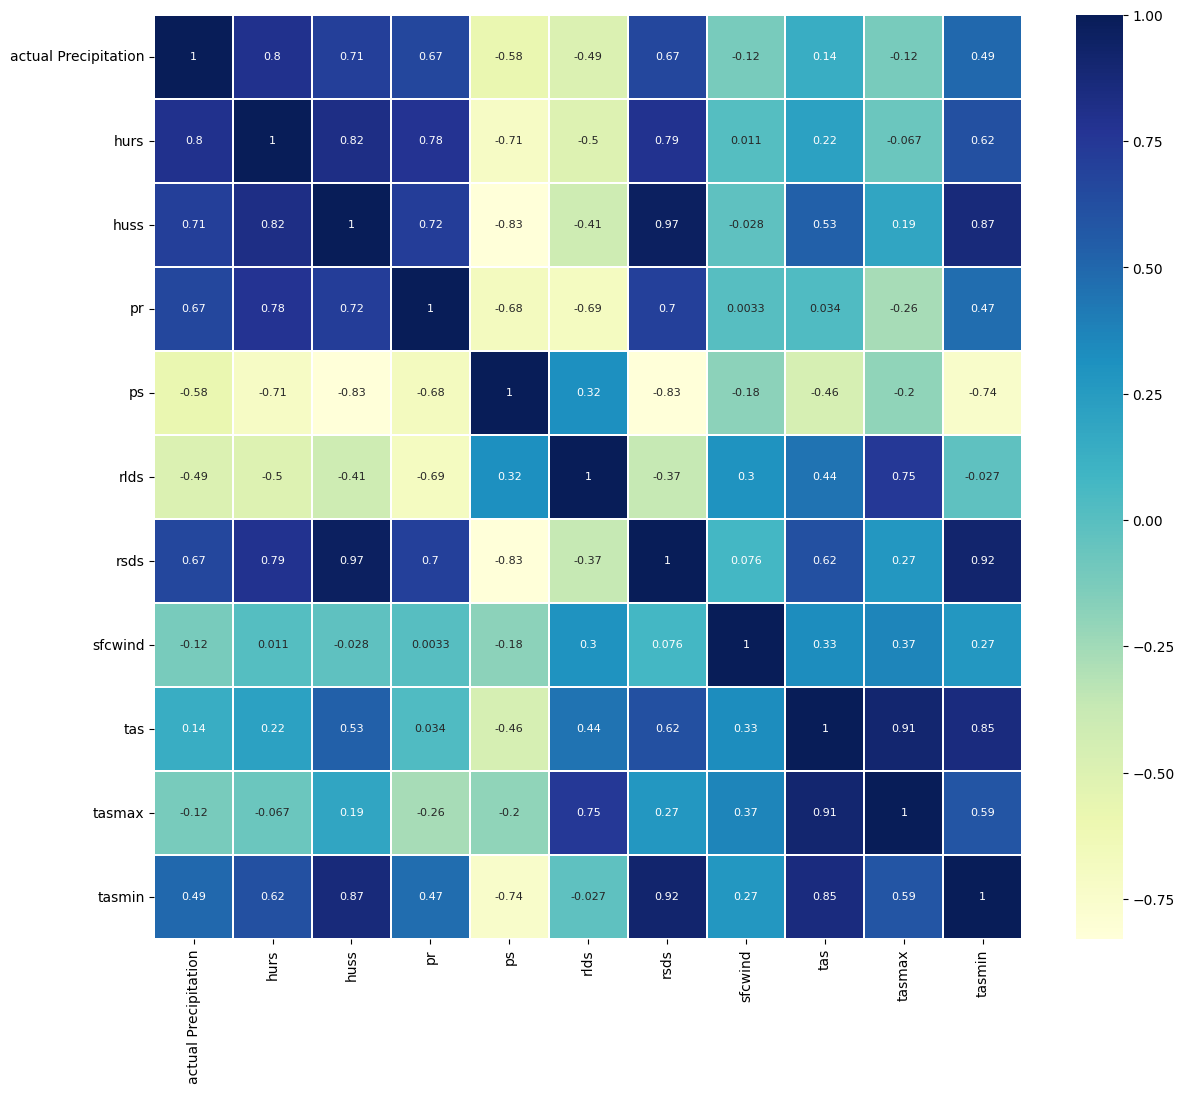

In [ ]:
#Visualize mô hình thể hiện mối tương quan giữa các thuộc tính
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0)
plt.show()

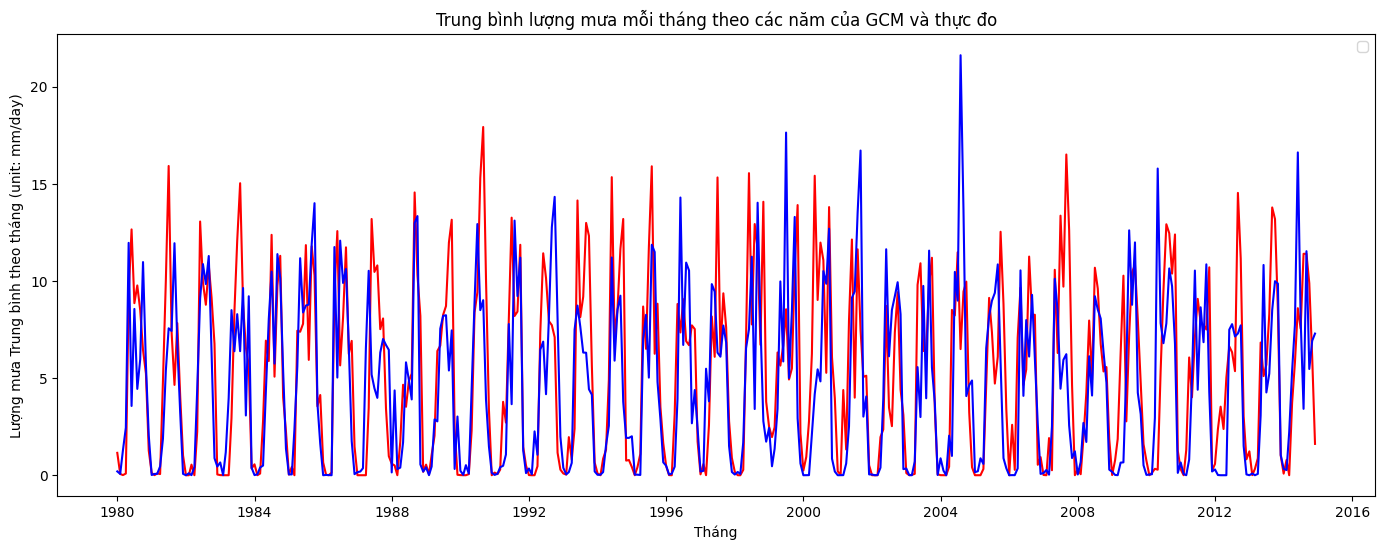

In [ ]:
# bar chart
plt.figure(figsize=(17, 6))
plt.plot(df.index, df['actual Precipitation'], color='red')
plt.plot(df.index, df['pr'], color='blue')
# Đặt nhãn cho trục x và y
plt.xlabel('Tháng')
plt.ylabel('Lượng mưa Trung bình theo tháng (unit: mm/day)')
# Đặt tiêu đề cho biểu đồ
plt.title('Trung bình lượng mưa mỗi tháng theo các năm của GCM và thực đo')
# Hiển thị biểu đồ
plt.legend()
plt.show()

# Train test split

In [ ]:
start_date = dt.datetime(2010, 1, 1)
df.index = pd.to_datetime(df.index)
train_set = df[df.index < start_date]
test_set = df[df.index >= start_date]

In [ ]:
X_train = train_set.drop('actual Precipitation', axis = 1)
X_test = test_set.drop('actual Precipitation', axis = 1)
y_train = train_set['actual Precipitation']
y_test = test_set['actual Precipitation']

# Evaluate function

In [ ]:
def NSE(y_test, y_pred):
  return 1-(np.sum((y_test-y_pred)**2)/np.sum((y_test-np.mean(y_test))**2))
nse_scorer = make_scorer(NSE)

In [ ]:
# Hàm RMSE custom
def RMSE(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)
rmse_scorer = make_scorer(RMSE)

In [ ]:
def  MAE(y_test, y_pred):
    return mean_absolute_error(y_test, y_pred)
mae_scorer = make_scorer(MAE)

# XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

- feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

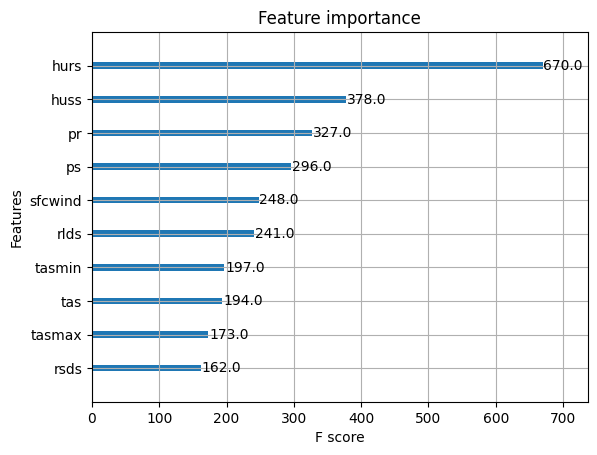

In [ ]:
xgb_model.get_params()
xgb.plot_importance(xgb_model)

- Check overfit



In [ ]:
y_pred_train = xgb_model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
nse = NSE(y_test=y_train.values, y_pred=y_pred_train)
print('Mean absolute Error:', mae)
print('Root mean squared Error:', rmse)
print("NSE:", nse)

Mean absolute Error: 0.00947031548247074
Root mean squared Error: 0.013162807164041274
NSE: 0.9999918039565864


In [ ]:
y_pred_test = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
nse = NSE(y_test=y_test.values, y_pred=y_pred_test)
print('Mean absolute Error:', mae)
print('Root mean squared Error:', rmse)
print("NSE:", nse)

Mean absolute Error: 2.153151680373244
Root mean squared Error: 3.1639528780197006
NSE: 0.48375836856090704


# LightGBM

In [ ]:
import lightgbm as lgb
model_LightGBM = lgb.LGBMRegressor()
model_LightGBM.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1206
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 10
[LightGBM] [Info] Start training from score 5.217192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

LGBMRegressor()

- feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

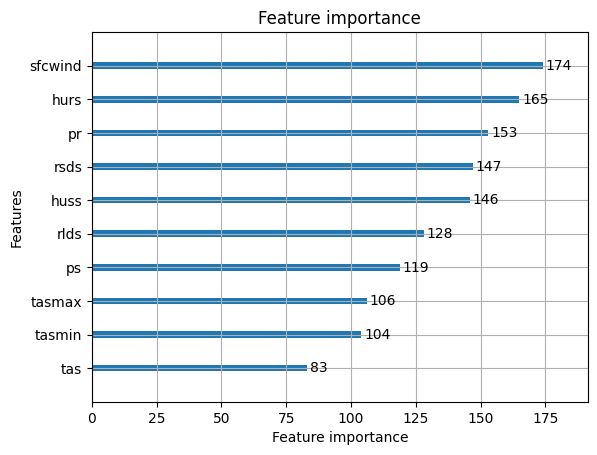

In [ ]:
model_LightGBM.get_params()
lgb.plot_importance(model_LightGBM)

- check overfit

In [ ]:
y_pred_train_lightgbm = model_LightGBM.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_lightgbm))
mae = mean_absolute_error(y_train, y_pred_train_lightgbm)
nse = NSE(y_train, y_pred_train_lightgbm)
print('Root mean squared error train: %f' %(rmse))
print('Mean Abosolute error train: %f' %(mae))
print('NSE train: %f' %(nse))

Root mean squared error train: 1.110052
Mean Abosolute error train: 0.781125
NSE train: 0.941710


In [ ]:
y_pred_test_lightgbm = model_LightGBM.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_lightgbm))
mae = mean_absolute_error(y_test, y_pred_test_lightgbm)
nse = NSE(y_test, y_pred_test_lightgbm)
print('Root mean squared error test: %f' %(rmse))
print('Mean Abosolute error test: %f' %(mae))
print('NSE test: %f' %(nse))

Root mean squared error test: 2.836500
Mean Abosolute error test: 1.970660
NSE test: 0.585086


# Prepare for GridSeachCV

- feature and target

In [ ]:
X = df.drop('actual Precipitation', axis = 1)
y = df['actual Precipitation']

- grid of hyperparameter

In [ ]:
# Define the hyperparameters you want to search over
n_estimators = [50, 60, 70, 100, 150, 200]
max_depth = [2, 4, 6, 8]
learning_rate = [0.001, 0.01, 0.1, 0.4, 0.5, 0.8, 1]
lambda_val = [ 0.001, 0.01, 0.1, 0.3, 0.5]
gamma = [0.01, 0.1, 0.3, 0.5, 1, 3, 5]

# Tạo scorer dựa trên RMSE
rmse_scorer = make_scorer(RMSE)

# KFold đảm bảo chia dữ liệu thành các fold.
kfold = KFold(n_splits=10, shuffle=True, random_state= 42)

# Tunning hyperparameters for XGBoost model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

- searching hyperparameter

In [ ]:
# Define the XGBRegressor
model = xgb.XGBRegressor(objective='reg:tweedie')

# Create a parameter grid
param_grid_xgb = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'reg_lambda': lambda_val,
    'learning_rate': learning_rate,
    'gamma': gamma
}

#Đây là tạo một GridSearchCV object để tìm kiếm tập tham số tốt nhất cho mô hình.
#n_job=-1 : dùng CPU, cv=kfold: Sử dụng phương thức cross-validation cho k fold, verbose=1: In kết quả tối ưu hóa trong quá trình thực thi.
grid_search = GridSearchCV(xgb_model,
                           param_grid_xgb,
                           scoring = rmse_scorer,
                           cv=kfold,
                           verbose=1,
                           error_score='raise',
                          )
grid_result = grid_search.fit(X,y)

Fitting 10 folds for each of 5880 candidates, totalling 58800 fits


In [ ]:
# Xác định index của kết quả có RMSE nhỏ nhất
best_index = grid_result.cv_results_['mean_test_score'].argmin()

# Truy cập giá trị RMSE và bộ siêu tham số tương ứng
best_rmse = grid_result.cv_results_['mean_test_score'][best_index]
best_params = grid_result.cv_results_['params'][best_index]

# In ra giá trị RMSE nhỏ nhất và bộ siêu tham số tương ứng
print("Best RMSE:", best_rmse)
print("Best Parameters:", best_params)

Best RMSE: 2.6908000096670186
Best Parameters: {'gamma': 5, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.3}


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
4.371515 (0.307770) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 70, 'reg_lambda': 0.001}
4.371540 (0.307734) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 70, 'reg_lambda': 0.01}
4.371509 (0.307329) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 70, 'reg_lambda': 0.1}
4.370494 (0.307415) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 70, 'reg_lambda': 0.3}
4.370598 (0.306486) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 70, 'reg_lambda': 0.5}
4.292724 (0.307110) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 100, 'reg_lambda': 0.001}
4.292684 (0.307011) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 100, 'reg_lambda': 0.01}
4.292436 (0.306484) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators'

- using the best hyperparameter

In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:tweedie', gamma = 3, learning_rate = 0.1, max_depth = 2, n_estimators = 50, reg_lambda = 0.3)
xgb_model.fit(X_train,
              y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, objective='reg:tweedie', ...)

- evaluate model

In [ ]:
y_pred_train = xgb_model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
nse = NSE(y_test=y_train.values, y_pred=y_pred_train)
print('Mean absolute Error Train:', mae)
print('Root mean squared Error Train:', rmse)
print("NSE Train:", nse)

Mean absolute Error Train: 1.708480687233186
Root mean squared Error Train: 2.4074838152869034
NSE Train: 0.7258211410287418


In [ ]:
y_pred_test = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
nse = NSE(y_test=y_test.values, y_pred=y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Mean absolute Error:', mae)
print('Root mean squared Error:', rmse)
print("NSE:", nse)

Mean absolute Error: 2.079302654473343
Root mean squared Error: 2.913414852341795
NSE: 0.5622787096114248


- cross validate

In [ ]:
# Đánh giá độ chính xác
mae = cross_val_score(xgb_model,X,y, cv=kfold, scoring=mae_scorer)
rmse = cross_val_score(xgb_model,X,y, cv=kfold, scoring=rmse_scorer)
nse = cross_val_score(xgb_model,X,y, cv=kfold, scoring=nse_scorer)
print(f'RMSE of each fold:')
print(rmse)
print(f'mean RMSE of Fold: {rmse.mean()}')
print(f'\nMAE of each fold:')
print(mae)
print(f'mean MAE of Fold: {mae.mean()}')
print(f'\nNSE of each fold:')
print(nse)
print(f'mean NSE of Fold: {nse.mean()}')

RMSE of each fold:
[2.16749502 3.07882426 2.76011263 2.93325895 2.45267852 2.03464043
 2.76070969 2.85259321 2.47009175 2.94122295]
mean RMSE of Fold: 2.64516274087568

MAE of each fold:
[1.57672695 2.32546285 2.09579732 2.05748657 1.69104832 1.61033466
 1.9268007  1.99299621 1.87719061 2.21298684]
mean MAE of Fold: 1.936683102368642

NSE of each fold:
[0.72402508 0.54725554 0.67353932 0.67758667 0.69068264 0.75684574
 0.6262324  0.62376227 0.69902306 0.51877723]
mean NSE of Fold: 0.6537729932849882


- visualize prediction and compare actual

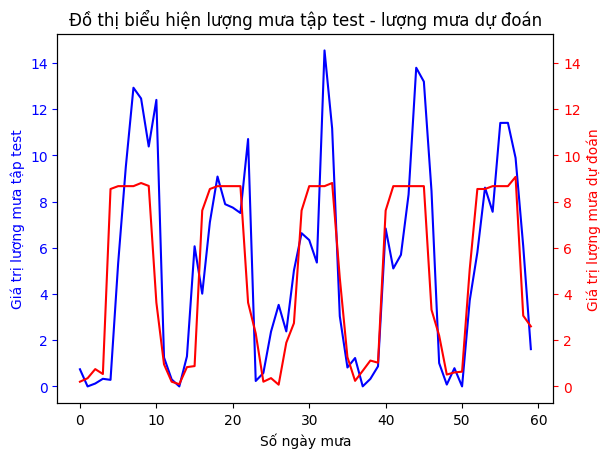

In [ ]:
# Dữ liệu cho trục y thứ nhất
x = range(len(y_test))
y1 = y_test

# Tạo đối tượng Axes thứ nhất
fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='blue')
ax1.set_xlabel('Số ngày mưa')
ax1.set_ylabel('Giá trị lượng mưa tập test', color='b')
ax1.tick_params('y', colors='blue')

# Dữ liệu cho trục y thứ hai
y2 = y_pred_test

# Tạo đối tượng Axes thứ hai
ax2 = ax1.twinx()
ax2.plot(x, y2, 'red')
ax2.set_ylabel('Giá trị lượng mưa dự đoán', color='r')
ax2.tick_params('y', colors='red')
# Đặt giới hạn cho trục y2 dựa trên giới hạn của trục y1
y1_min, y1_max = ax1.get_ylim()
ax2.set_ylim(y1_min, y1_max)

# Tiêu đề
plt.title('Đồ thị biểu hiện lượng mưa tập test - lượng mưa dự đoán')

# Hiển thị đồ thị
plt.show()


- feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

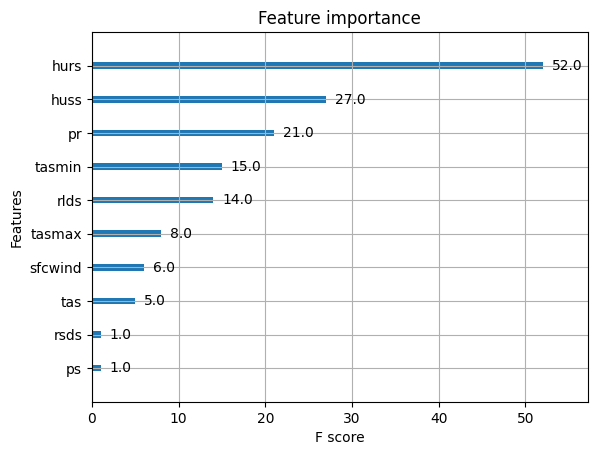

In [ ]:
xgb_model.get_params()
xgb.plot_importance(xgb_model)

# Tunning Hyperparameter for LightGBM

- define model and parameter grid

In [ ]:
params = {
    'objective': 'tweedie',
    'metric': 'mean_squared_error',
    'force_row_wise': 'True',
    'boosting_type':'dart'
}
model_LightGBM = lgb.LGBMRegressor(**params)

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'reg_lambda': lambda_val,
    'learning_rate': learning_rate
}

- Searching best hyperparameter

In [ ]:
grid_search = GridSearchCV(
    estimator=model_LightGBM,
    param_grid=param_grid,
    cv=kfold,
    scoring=rmse_scorer,
    error_score='raise'
)
grid_result=grid_search.fit(X,y)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [ ]:
# Xác định index của kết quả có RMSE nhỏ nhất
best_index = grid_result.cv_results_['mean_test_score'].argmin()

# Truy cập giá trị RMSE và bộ siêu tham số tương ứng
best_rmse = grid_result.cv_results_['mean_test_score'][best_index]
best_params = grid_result.cv_results_['params'][best_index]

# In ra giá trị RMSE nhỏ nhất và bộ siêu tham số tương ứng
print("Best RMSE:", best_rmse)
print("Best Parameters:", best_params)

Best RMSE: 2.723872477423255
Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200, 'reg_lambda': 0.1}


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

4.583236 (0.387299) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.001}
4.583234 (0.387301) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.01}
4.583306 (0.387267) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.1}
4.583470 (0.387179) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.3}
4.583643 (0.387106) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.5}
4.819407 (0.448475) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 60, 'reg_lambda': 0.001}
4.819408 (0.448479) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 60, 'reg_lambda': 0.01}
4.819454 (0.448459) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 60, 'reg_lambda': 0.1}
4.819556 (0.448400) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 60, 'reg_lambda': 0.3}
4.819663 (0.448357) with: {'learning_rat

- using best hyperparameter

In [ ]:
params = {
    'objective': 'tweedie',
    'metric': 'mean_squared_error',
    'force_row_wise': True,
    'boosting_type': 'dart',
    'n_estimators': 200,
    'max_depth': 2,
    'learning_rate': 0.1,
    'reg_lambda': 0.1
}

model_train_lightgbm = lgb.LGBMRegressor(**params)

# Fit the model with early stopping
model_train_lightgbm.fit(
    X_train,
    y_train
)

[LightGBM] [Info] Total Bins 1206
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 10
[LightGBM] [Info] Start training from score 1.651959


LGBMRegressor(boosting_type='dart', force_row_wise=True, max_depth=2,
              metric='mean_squared_error', n_estimators=200,
              objective='tweedie', reg_lambda=0.1)

- evaluate best model

In [ ]:
y_pred_train = model_train_lightgbm.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
nse = NSE(y_test=y_train.values, y_pred=y_pred_train)
print('Mean absolute Error Train:', mae)
print('Root mean squared Error Train:', rmse)
print("NSE Train:", nse)

Mean absolute Error Train: 1.6930514684993765
Root mean squared Error Train: 2.4340863943302624
NSE Train: 0.7197283372917758


In [ ]:
y_pred_test = model_train_lightgbm.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
nse = NSE(y_test=y_test.values, y_pred=y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Mean absolute Error:', mae)
print('Root mean squared Error:', rmse)
print("NSE:", nse)

Mean absolute Error: 2.0102517465920835
Root mean squared Error: 2.90222454692267
NSE: 0.5656347905111523


- cross validate

In [ ]:
# Đánh giá độ chính xác
mae = cross_val_score(model_train_lightgbm,X,y, cv=kfold, scoring=mae_scorer)
rmse = cross_val_score(model_train_lightgbm,X,y, cv=kfold, scoring=rmse_scorer)
nse = cross_val_score(model_train_lightgbm,X,y, cv=kfold, scoring=nse_scorer)
print(f'RMSE of each fold:')
print(rmse)
print(f'mean RMSE of Fold: {rmse.mean()}')
print(f'\nMAE of each fold:')
print(mae)
print(f'mean MAE of Fold: {mae.mean()}')
print(f'\nNSE of each fold:')
print(nse)
print(f'mean NSE of Fold: {nse.mean()}')

[LightGBM] [Info] Total Bins 1265
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 10
[LightGBM] [Info] Start training from score 1.656058
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Total Bins 1265
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 10
[LightGBM] [Info] Start training from score 1.623759
[LightGBM] [Info] Total Bins 1265
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 10
[LightGBM] [Info] Start training from score 1.655677
[LightGBM] [Info] Total Bins 1265
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 10
[LightGBM] [Info] Start training from score 1.650621
[LightGBM] [Info] Total Bins 1265
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 10
[LightGBM] [Info] Start training from score 1.649018
[LightGBM] [Info] Total Bins 1265
[

- visualize prediction and compare with actual

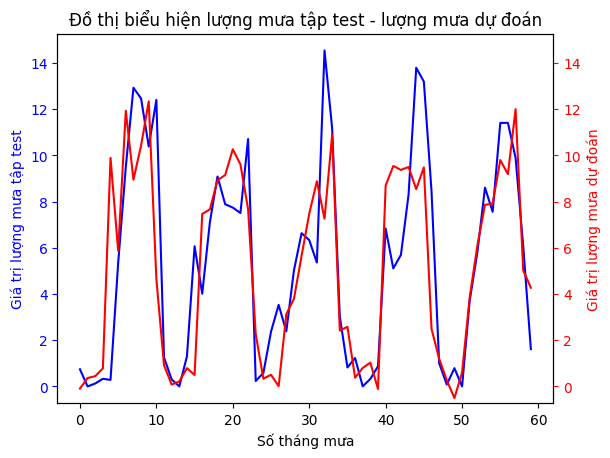

In [ ]:
# Dữ liệu cho trục y thứ nhất
x = range(len(y_test))
y1 = y_test

# Tạo đối tượng Axes thứ nhất
fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='blue')
ax1.set_xlabel('Số tháng mưa')
ax1.set_ylabel('Giá trị lượng mưa tập test', color='b')
ax1.tick_params('y', colors='blue')

# Dữ liệu cho trục y thứ hai
y2 = y_pred_test_lightgbm

# Tạo đối tượng Axes thứ hai
ax2 = ax1.twinx()
ax2.plot(x, y2, 'red')
ax2.set_ylabel('Giá trị lượng mưa dự đoán', color='r')
ax2.tick_params('y', colors='red')
# Đặt giới hạn cho trục y2 dựa trên giới hạn của trục y1
y1_min, y1_max = ax1.get_ylim()
ax2.set_ylim(y1_min, y1_max)

# Tiêu đề
plt.title('Đồ thị biểu hiện lượng mưa tập test - lượng mưa dự đoán')

# Hiển thị đồ thị
plt.show()


- feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

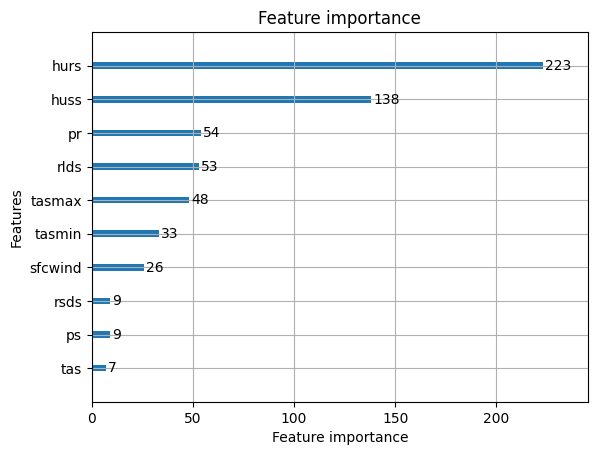

In [ ]:
model_train_lightgbm.get_params()
lgb.plot_importance(model_train_lightgbm)